 ## Waste Management using CNN Model

In [1]:
pip install opencv-python


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [4]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install tqdm

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
train_path = "dataset/TRAIN"
test_path = "dataset/TEST"

In [17]:
# Importing Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob
from tqdm import tqdm
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 


In [11]:
# Visualization
x_data = []
y_data = []
for category in glob(train_path+"/*"):
    for file in tqdm(glob(category+"/*")):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])
data = pd.DataFrame({'image':x_data,"label":y_data})

100%|██████████| 9999/9999 [00:03<00:00, 2977.06it/s]


In [12]:
data.shape

(22564, 2)

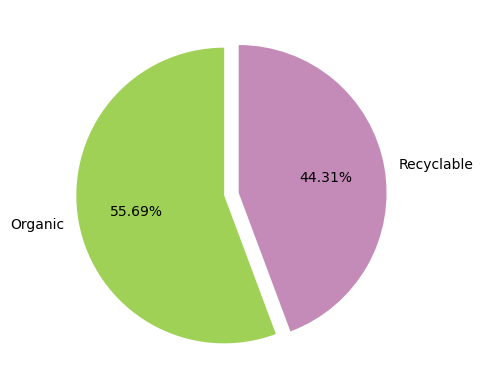

In [15]:
colors = ["#a0d157", "#c48bb8"]
plt.pie(data.label.value_counts(), labels = ["Organic","Recyclable"], autopct = '%0.2f%%', colors = colors, startangle = 90, explode = [0.05, 0.05] ) #explode is optional
plt.show()

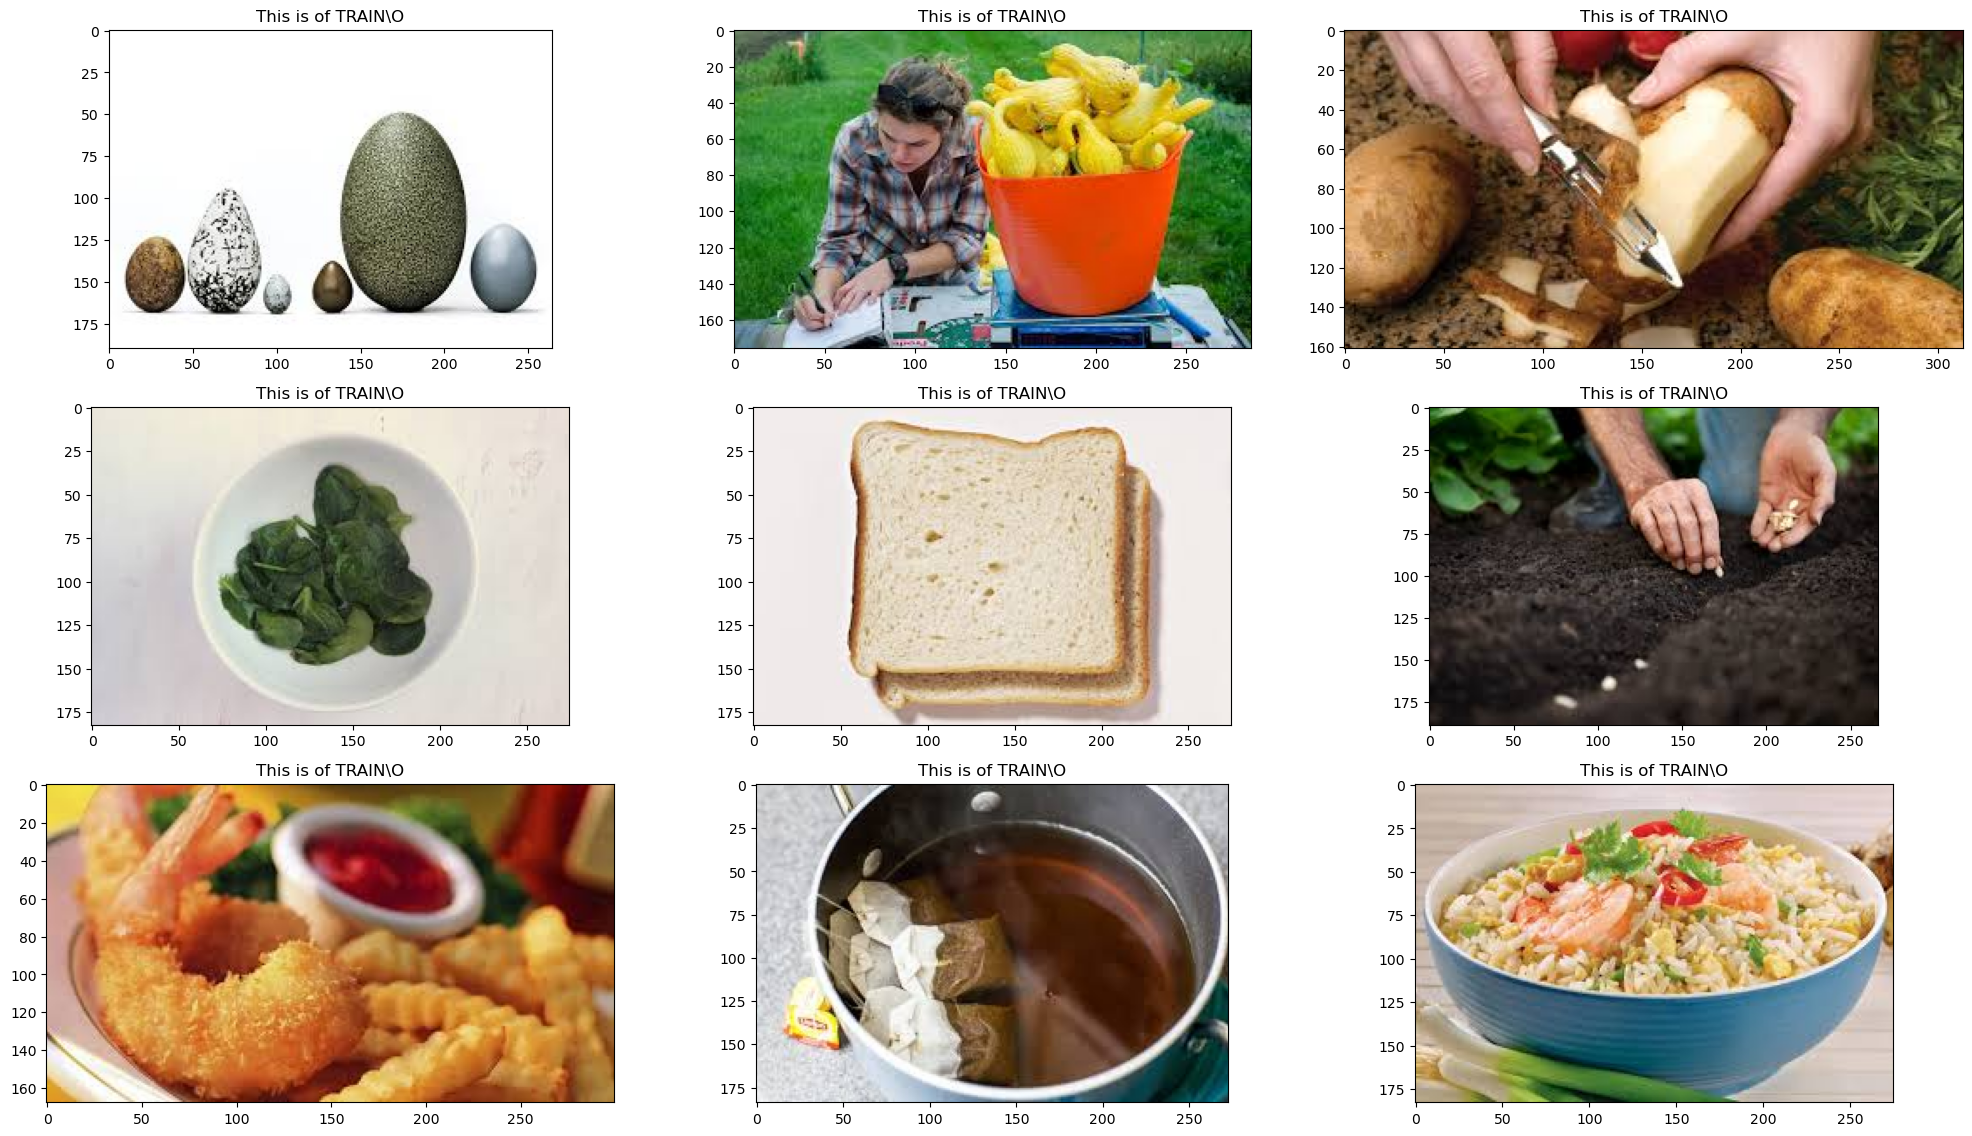

In [18]:
plt.figure(figsize=(20, 15))
for i in range(9):
    plt.subplot(4, 3,(i%12)+1)
    index = np.random.randint(15000)
    plt.title('This is of {0}'.format(data.label[index]))
    plt.imshow(data.image[index])
    plt.tight_layout()

In [19]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])
batch_size = 256

C:\Users\ComputerCenter3\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 222, 222, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 109, 109, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 52, 52, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,261,250 (84.92 MB)

 Trainable params: 22,261,250 (84.92 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
train_datagen = ImageDataGenerator(rescale = 1./255)

In [22]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [23]:
train_generator = train_datagen.flow_from_directory(
    train_path, 
    target_size = (224, 224),
    batch_size = batch_size, 
    color_mode = "rgb", 
    class_mode = "categorical")

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size = (224, 224),
    batch_size = batch_size,
    color_mode = "rgb",
    class_mode = "categorical")

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [24]:
hist = model.fit(
    train_generator, 
    epochs=10, 
    validation_data=test_generator
)

C:\Users\ComputerCenter3\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 408s 5s/step - accuracy: 0.6792 - loss: 0.6635 - val_accuracy: 0.8747 - val_loss: 0.3626
Epoch 2/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 362s 4s/step - accuracy: 0.8183 - loss: 0.4368 - val_accuracy: 0.8691 - val_loss: 0.3264
Epoch 3/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 358s 4s/step - accuracy: 0.8400 - loss: 0.3867 - val_accuracy: 0.8874 - val_loss: 0.3044
Epoch 4/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 339s 4s/step - accuracy: 0.8467 - loss: 0.3706 - val_accuracy: 0.8806 - val_loss: 0.2865
Epoch 5/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 338s 4s/step - accuracy: 0.8597 - loss: 0.3469 - val_accuracy: 0.8758 - val_loss: 0.3124
Epoch 6/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 337s 4s/step - accuracy: 0.8823 - loss: 0.3084 - val_accuracy: 0.8520 - val_loss: 0.3586
Epoch 7/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 360s 4s/step - accuracy: 0.8909 - loss: 0.2774 - val_accuracy: 0.8874 - val_loss: 0.3062
Epoch 8/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 347s 4s/step - accuracy: 0.9045 - loss: 0.2451 - val_accuracy: 0.8890 - v